# 진행과정과 생각 정리

1. 문제 인식

문제에 제시된 설명을 읽고난 후 손그림을 분류 340개의 클래스로 훈련시켜 줘야한다는 것을 알았다.
평가 매기는 방식은 key_id칼럼의 테스트 세트에 대해 word값중 acc가 높은 3개의 클래스를 넣어 csv로 만들어주는 것이고
word에 들어있는 공백은 '_'로 치환하여 제출하라고 되어있었다.
데이터 탭으로 들어가 데이터에 대한 설명을 읽었다.
raw데이터와 simplified데이터가 있는데 모두 사용할수 있다고 했으나
simplified데이터가 동일안 정보를 효과적으로 제공한다고 써있어서 사용하였다 (raw도 확인하려 했으나 안들어가졌다.)
그 후 sample_submission에서 제출 양식을 확인할 수 있었다.

2. 데이터 확인

그 후에 제공된 데이터 확인을 하였다.
csv의 갯수 즉 클래스의 갯수는 340개였고, 
bird.csv를 읽어와서 확인해봤더니 countrycode,drawing,key_id,recognized,timestamp,word 칼럼이 있었다.
bird.csv의 데이터의 갯수는 12만개 정도 였고, 누락값은 없었다.
그림에 대한 이상치데이터는 recognized 칼럼 부분이 True와 False로 나타내고 있었는데 
bird.csv데이터 2000개를 기준으로 True가 1659개 False가 341개 였다.
처음에는 test에도 False데이터가 있을거라고 판단하여 데이터 전체를 사용하였다.
그 후 문제에 제시된 word 열의 공백을 모두 '_'로 replace 해주었다.

3. 첫번째 난관

drawing이 이미지를 나타내는 칼럼이었는데 pandas로 읽었기 때문에 모두 string으로 반환되었다
그래서 검색 결과 np.matrix를 통해 변환할 수 있다는 것을 알았고 matrix를 사용하여
변환해 보았지만 가장안쪽 배열의 구조는 유지 되지 않은채 값들을 전부 1차원으로 반환하였다.
문자열이라 shape도 1차원으로 나오는 탓에 고민을 많이 했다.
그 후에 ast.literal_eval이라는 함수가 시퀀스형 데이터로 만들어진 문자열을 시퀀스 데이터 그대로변환할수있는걸 알았고
ast.literal_eval 함수를 이용하여 시퀀스형 데이터로 변환해 주었다.

4. 두번째 난관

배열은 변환 하였으나 이미지가 NxN형태의 배열이 아니었다. 
꽤나 오랫동안 고민끝에 홈페이지의 문제를 다시 인식하기로 했고 dataset에 대한 깃허브페이지가 있었다.
깃허브 페이지를 보아 x,y,t로 이루어져있고 t에대한 정보를 제거해서 사용한다고 써있었는데
csv로 주어진 대회 데이터는 t는 이미 지워진 형태였다. bird[0]을 뽑아서 2가지의 배열만 있다는 것을 확인할 수 있었다.
그 후에 plt.plot을 이용하여 xy배열을 넣어 확인해보니 그림의 형태가 그려졌다.

5. 세번째 난관

그림은 그렸으나 이것을 이미지로 만들어야만 훈련데이터에 집어넣어 훈련을 해볼 수 있었는데 
plt에서 그린그림을 그대로 사용하기에는 색깔도 있고 정확한 형태가 아니었다.
그래서 pillow 모듈을 이용하여 이미지를 직접 그려넣어 주었다.
이미지를 확인하는 과정에서 True data와 False data를 확인해보았는데 
False데이터는 그림이 아닌것들도 있고 (예를들면 airplane 데이터의 그림의 대부분이 AIRPLANE이라고 영어로 손글씨로 적어논 그림들이 있다.)
제대로 그려지지 않았기 때문에 True data만 사용하기로 하였다.

6. 네번째 난관

전처리 알고리즘을 끝내고 training data를 만드는데 1개의 클래스 (1개의 csv파일)당 약 1분30초가량걸렸다.
데이터를 모두 읽어오기에는 전체 데이터의 갯수가 약 3000만개 이므로 RAM 메모리에 올릴수가 없어 물리적 문제가 생기고 
1개의 파일(클래스)당 1분30초가 걸리기 때문에 340개의 클래스를 모두 읽기에는 시간적으로도 문제가 있었다.
일단 훈련이 되고 accuracy확인한 후에 데이터의 갯수를 정해는게 맞다고 생각이 들어 
클래스당 1000개의 데이터로 먼저 진행을 하였다.

7. 다섯번째 난관

CNN모델을 설계하여 바로 집어넣어 봤으나 전에 배웠던 1.9.0 버전이라 문법오류가 났다. 
kaggle kernel에서 제공하는 tf버전은 2.0임을 확인한 후에 tensorflow와 keras중 고민하다가
아직 사용해보지 않은 keras를 공부하는 목적에서 keras책을 구입하여 keras로 모델을 설계했다.

8. keras공부 후

CNN 초기모델을 먼저 설계해서 넣어보았다 그러나 Training data의 loss가 전혀 떨어 지지않았다.
VGG16 모델 또한 직접 설계하여 넣어 보았는데 CNN 과 같이 역시 loss가 떨어지지 않는 문제가 생겼다.
그 후 데이터 전처리의 문제인지 모델의 문제인지 확인하기 위해 
검증된 모델인 ResNet모델을 넣어 보았는데 작동이 되기 시작했다 그러나 22epoch기준으로 
acc가 훈련데이터는 평균 :0.7 최고 : 0.98 , 검증데이터는 평균 :0.5 최고 :0.83 에서 그쳤다.
epoch을 늘리기엔 훈련시간이 약 5시간정도 걸렸기 때문에 클래스를 줄여서 모델별로 acc를 확인하며 진행을 해보기로 하였다.

9. 실험 과정

3클래스 CNN은 loss가 떨어지지않아 acc도 오르지 않음 
       VGG16 도 CNN과 같은 결과
       ResNet은 50 epoch결과 val데이터를 0.97까지 구분해 냈다.

50클래스 CNN 위와 비슷한결과
        VGG16 역시 비슷한결과
        ResNet은 오르긴 하지만 일정구간에서 val데이터셋의 loss가 떨어지지 않고 오버피팅이 일어났다.

recognized 가True인 것으로 실험
위의 5번에서 말한것과 같이 False데이터를 제외하고 다시 훈련을 시켜 보았다.

50클래스 CNN도 작동하기 시작했고 평균 acc가 83 , top acc가 95까지 줄었다. 훈련시간이 매우 적었다.
        VGG는 역시 작동하지 않았다.(이유는 convolution이 여러번 쌓여 5x5나 7x7필터처럼 작용하는것 때문으로 생각 한다.)
        ResNet은 12epoch때 까지는 loss가 충분히 감소하고 평균 acc가 87 , top3 acc가 98 까지 나왔다.
하지만 모든 모델들이 에포크 초반에 오버피팅이 되어 val loss가 발산을 하는 것을 확인할 수가 있었다.

먼저 오버피팅을 막기위해 CNN초기모델을 커스텀하여 모델을 만들어 보고자 하였다.
batch nomalization노드를 넣어 주고 실험을 다시했다. 그러나 아직도 오버피팅으로
loss가 발산해서 발산하지 않게 하는것을 목표로 했다 dropout을 추가해서 다시 해보았더니 loss는 발산하지 않았지만
전체 acc가 높게 나오지 않았다. 그래서 데이터의 형태를 다시 보고 일정한패턴은 있지만 유일무이한 패턴이
없다고 생각하고 averagepooling을 사용해보았더니 loss가 안정되고 acc가 향상 되었다.

그 후 Accuracy를 높이기 위해 전처리된 이미지 데이터를 바꿔보기로 하였다.
처음 그렸던 그림은 배경이 255 그림이 0 값을 가지고 있었기에 배경을 0으로 그림을 1로 바꿔주어서 확인 해보았다.
50클래스 반전 이미지 CNN val loss 0.58 val 평균 acc 87 
                  CNN_average val_loss 0.5 평균 acc 0.88 
                  ResNet val_loss 0.49 평균 acc 0.89

ResNet은 성능이 제일 좋게 나왔지만 그냥 짜여진 모델을 사용하는 것보다는 직접 설계해본 모델로 제출하기로 마음 먹고
설계한 모델로 340클래스당 데이터 2000개씩 훈련시켜 분류 해보기로 하였다. 

340클래스 average pooling사용 -> val acc 75 top3 acc 91
         Max pooling사용 -> val acc 69 top3 acc 89

최종적으로 average pooling을 사용한 모델로 결정하여 제출하기로 하였다.

# 사용할 패키지 모듈 import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from PIL import Image , ImageDraw
from sklearn.preprocessing import *
import time
import ast
import os
import tensorflow as tf
from keras import models, layers
from keras import Input
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import BatchNormalization, Conv2D, Activation , AveragePooling2D
from keras.layers import Dense, GlobalAveragePooling2D, MaxPooling2D, ZeroPadding2D, Add
from keras.models import Sequential
from keras.metrics import top_k_categorical_accuracy
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tqdm import tqdm

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        fpath = os.path.join(dirname, filename)

Using TensorFlow backend.


# 폴더이름과 파일 이름 확인

In [2]:
print(dirname)
print(filenames[0])

/kaggle/input/quickdraw-doodle-recognition/train_simplified
sleeping bag.csv


# pandas를 이용하여 데이터 확인

In [3]:
df = pd.read_csv(dirname+'/'+'bird.csv')
df['word'] = df['word'].replace(' ','_',regex = True)
print(type(df['recognized'][0]))

idx= df.iloc[:5].index
print(df.loc[idx,'recognized'].values)

for i in range(len(df.loc[idx,'drawing'].values)) :
    if df.loc[idx,'recognized'].values[i] == True :
        print(i, end=' ')

idx= df.iloc[:2000].index
T_cnt = 0
F_cnt = 0
for i in range(len(df.loc[idx,'drawing'].values)) :
    if df.loc[idx,'recognized'].values[i] == True :
        T_cnt += 1
    else : F_cnt += 1

print('\nTrue Count :',T_cnt)
print('False Count :',F_cnt)
df.head()

<class 'numpy.bool_'>
[ True  True  True  True False]
0 1 2 3 
True Count : 1659
False Count : 341


,countrycode,drawing,key_id,recognized,timestamp,word
0,US,"[[[0, 11, 23, 50, 72, 96, 97, 132, 158, 224, 2...",4926006882205696,True,2017-03-09 00:28:55.637750,bird
1,US,"[[[65, 194, 221, 240, 250, 255, 251, 242, 227,...",5357674197680128,True,2017-03-29 04:22:58.822970,bird
2,US,"[[[159, 163, 175, 189, 201, 209, 227, 245, 253...",5553672849195008,True,2017-03-17 19:31:28.879810,bird
3,DE,"[[[72, 76, 81], [138, 178, 193]], [[87, 116], ...",5635633911431168,True,2017-03-20 14:13:01.811800,bird
4,ZA,"[[[28, 25, 36, 49, 70, 88, 113, 126, 139, 157,...",5696703329992704,False,2017-03-10 13:05:10.002030,bird


# pyplot을 이용하여 그림 확인

[[[72, 76, 81], [138, 178, 193]], [[87, 116], [174, 209]], [[68, 62, 58], [191, 196, 212]], [[161, 156, 160], [136, 182, 196]], [[149, 138, 130], [192, 199, 214]], [[169, 200], [190, 214]], [[52, 111, 156, 173, 187, 196, 203, 204, 197, 183, 158, 121, 86, 63, 47, 46, 50], [130, 149, 152, 150, 143, 136, 122, 98, 80, 65, 52, 47, 56, 73, 105, 124, 135]], [[59, 17, 0], [71, 112, 140]], [[84, 68, 40, 23, 6], [82, 88, 105, 121, 146]], [[66, 29, 0], [99, 118, 140]], [[194, 206], [80, 50]], [[241, 226, 216, 195, 190, 190, 196, 203, 214, 230, 229, 214], [6, 6, 9, 26, 35, 53, 62, 64, 63, 42, 31, 0]], [[223, 255, 246, 228], [24, 30, 39, 43]]]


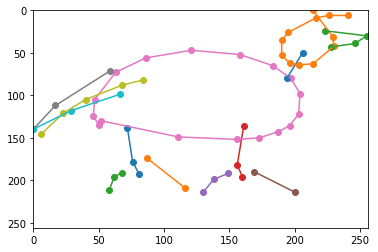

In [4]:
def check_draw(img_arr) :
    k=3
    for i in range(len(img_arr[k])):
        img = plt.plot(img_arr[k][i][0],img_arr[k][i][1])
        plt.scatter(img_arr[k][i][0],img_arr[k][i][1])
    plt.xlim(0,256)
    plt.ylim(0,256)
    plt.gca().invert_yaxis()

ten_ids = df.iloc[:10].index
img_arr = [ast.literal_eval(lst) for lst in df.loc[ten_ids,'drawing'].values]  #ast.literal_eval is squence data made string to array
print(img_arr[3])
check_draw(img_arr)

# vector로 표현된 데이터를 이미지로 만들기위해 이미지로 그려준다

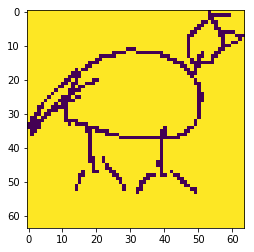

In [5]:
def make_img(img_arr) :
    image = Image.new("P", (256,256), color=255)
    image_draw = ImageDraw.Draw(image)
    for stroke in img_arr:
        for i in range(len(stroke[0])-1):
            image_draw.line([stroke[0][i], 
                             stroke[1][i],
                             stroke[0][i+1], 
                             stroke[1][i+1]],
                            fill=0, width=5)
    return image
img = make_img(img_arr[3])
img = img.resize((64,64))
plt.imshow(img)

# 전처리시 데이터가 전처리되는 과정을 확인할 퍼센트바

In [6]:
bar = '□□□□□□□□□□'
sw = 1
def percent_bar(array,count,st_time):   #퍼센트를 표시해주는 함수
    global bar
    global sw
    length = len(array)
    percent = (count/length)*100
    spend_time = time.time()-st_time
    if count == 1 :
        print('preprocessing...')
    print('\r'+bar+'%3s'%str(int(percent))+'% '+str(count)+'/'+str(length),'%.2f'%(spend_time)+'sec',end='')
    if sw == 1 :
        if int(percent) % 10 == 0 :
            bar = bar.replace('□','■',1)
            sw = 0
    elif sw == 0 :
        if int(percent) % 10 != 0 :
            sw = 1

# 위 함수들을 이용하여 전처리를 하여 Train데이터를 추출

In [7]:
def preprocessing(filenames) :
    img_batch = 2000
    X= []
    Y= []
    class_label = []
    st_time = time.time()
    class_num = 340
    Y_num = 0
    for fname in filenames[0:class_num] :
        percent_bar(filenames[0:class_num],Y_num+1,st_time)
        df = pd.read_csv(os.path.join(dirname,fname))
        df['word'] = df['word'].replace(' ','_',regex = True)
        class_label.append(df['word'][0])
        keys = df.iloc[:img_batch].index
        #print(len(keys))
        
        for i in range(len(df.loc[keys,'drawing'].values)) :
            if df.loc[keys,'recognized'].values[i] == True :
                drawing = ast.literal_eval(df.loc[keys,'drawing'].values[i])
                img = make_img(drawing)
                img = np.array(img.resize((64,64)))
                img = img.reshape(64,64,1)
                X.append(img)
                Y.append(Y_num)
        Y_num += 1
        
    tmpx = np.array(X)

    Y = np.array([[i] for i in Y])
    enc = OneHotEncoder(categories='auto')
    enc.fit(Y)
    tmpy = enc.transform(Y).toarray()
    
    del X
    del Y     #RAM메모리 절약을 위해 사용하지 않는 변수 삭제
    
    return tmpx , tmpy , class_label , class_num

tmpx , tmpy , class_label , class_num = preprocessing(filenames)
print('\n',tmpx.shape, tmpy.shape, '\n5th class : ',class_label[0:5])
#df.head()
#print(drawing[0])
#img = make_img(drawing[1])
#plt.imshow(img)

preprocessing...
■■■■■■■■■■100% 340/340 1709.19sec
 (624091, 64, 64, 1) (624091, 340) 
5th class :  ['sleeping_bag', 'house_plant', 'bathtub', 'key', 'triangle']


# 모델에서 확인할 train과 test를 나누어줌

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(tmpx,tmpy, test_size = 0.1,random_state = 0)
del tmpx
del tmpy     #RAM메모리 절약을 위해 사용하지 않는 변수 삭제

print(X_train.shape,X_val.shape,Y_train.shape,Y_val.shape)

(561681, 64, 64, 1) (62410, 64, 64, 1) (561681, 340) (62410, 340)


# 모델설계

**CNN 모델

In [9]:
#CNN
inputs = (64,64,1)
st_filter = 32
filter_size = (3,3) 
CNN = Sequential()
CNN.add(layers.Conv2D(st_filter,filter_size, input_shape = inputs ,padding= 'same'))
CNN.add(BatchNormalization())
CNN.add(Activation('relu'))
CNN.add(layers.MaxPooling2D((2,2),padding= 'same'))
CNN.add(layers.Dropout(0.5))
CNN.add(layers.Conv2D(st_filter*2,filter_size, input_shape = inputs,padding= 'same'))
CNN.add(BatchNormalization())
CNN.add(Activation('relu'))
CNN.add(layers.AveragePooling2D((2,2),padding= 'same'))
CNN.add(layers.Dropout(0.5))
CNN.add(layers.Conv2D(st_filter*4,filter_size, input_shape = inputs,padding= 'same'))
CNN.add(BatchNormalization())
CNN.add(Activation('relu'))
CNN.add(layers.AveragePooling2D((2,2),padding= 'same'))
CNN.add(layers.Dropout(0.25))
CNN.add(layers.Conv2D(st_filter*8,filter_size, input_shape = inputs,padding= 'same'))
CNN.add(BatchNormalization())
CNN.add(Activation('relu'))
CNN.add(layers.AveragePooling2D((2,2),padding= 'same'))
CNN.add(layers.Dropout(0.25))
CNN.add(layers.Conv2D(st_filter*16,filter_size, input_shape = inputs,padding= 'same'))
CNN.add(BatchNormalization())
CNN.add(layers.AveragePooling2D((2,2),padding= 'same'))
CNN.add(layers.Flatten())
CNN.add(layers.Dense(2*2*512,activation = 'relu'))
CNN.add(layers.Dropout(0.5))
CNN.add(layers.Dense(class_num, activation = 'softmax'))

CNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)       

**VGG16 모델

****VGG16****

    inputs = (64,64,1)
    st_filter = 32
    filter_size = (3,3) 

    VGG16 = Sequential()
    VGG16.add(layers.Conv2D(st_filter,filter_size, activation = 'relu', input_shape = inputs ,padding= 'same'))
    VGG16.add(layers.Conv2D(st_filter,filter_size, activation = 'relu', input_shape = inputs ,padding= 'same'))
    VGG16.add(layers.MaxPooling2D((2,2),padding= 'same'))
    VGG16.add(layers.Conv2D(st_filter*2,filter_size, activation = 'relu', input_shape = inputs,padding= 'same'))
    VGG16.add(layers.Conv2D(st_filter*2,filter_size, activation = 'relu', input_shape = inputs ,padding= 'same'))
    VGG16.add(layers.MaxPooling2D((2,2),padding= 'same'))
    VGG16.add(layers.Conv2D(st_filter*4,filter_size, activation = 'relu', input_shape = inputs,padding= 'same'))
    VGG16.add(layers.Conv2D(st_filter*4,filter_size, activation = 'relu', input_shape = inputs ,padding= 'same'))
    VGG16.add(layers.Conv2D(st_filter*4,filter_size, activation = 'relu', input_shape = inputs ,padding= 'same'))
    VGG16.add(layers.MaxPooling2D((2,2),padding= 'same'))
    VGG16.add(layers.Conv2D(st_filter*8,filter_size, activation = 'relu', input_shape = inputs,padding= 'same'))
    VGG16.add(layers.Conv2D(st_filter*8,filter_size, activation = 'relu', input_shape = inputs ,padding= 'same'))
    VGG16.add(layers.Conv2D(st_filter*8,filter_size, activation = 'relu', input_shape = inputs ,padding= 'same'))
    VGG16.add(layers.MaxPooling2D((2,2),padding= 'same'))
    VGG16.add(layers.Conv2D(st_filter*16,filter_size, activation = 'relu', input_shape = inputs ,padding= 'same'))
    VGG16.add(layers.Conv2D(st_filter*16,filter_size, activation = 'relu', input_shape = inputs ,padding= 'same'))
    VGG16.add(layers.Conv2D(st_filter*16,filter_size, activation = 'relu', input_shape = inputs ,padding= 'same'))
    VGG16.add(layers.MaxPooling2D((2,2),padding= 'same'))
    VGG16.add(layers.Flatten())
    VGG16.add(layers.Dense(2*2*512,activation = 'relu'))
    VGG16.add(layers.Dropout(0.5))
    VGG16.add(layers.Dense(class_num, activation = 'softmax'))

    VGG16.summary()

**ResNet50

    #ResNet50
    K = class_num

    input_tensor = Input(shape=(64, 64, 1), dtype='float32', name='input')

    def conv1_layer(x):    
        x = ZeroPadding2D(padding=(3, 3))(x)
        x = Conv2D(64, (7, 7), strides=(2, 2))(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = ZeroPadding2D(padding=(1,1))(x)

        return x   

    def conv2_layer(x):         
        x = MaxPooling2D((3, 3), 2)(x)     

        shortcut = x

        for i in range(3):
            if (i == 0):
                x = Conv2D(64, (1, 1), strides=(1, 1), padding='valid')(x)
                x = BatchNormalization()(x)
                x = Activation('relu')(x)

                x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
                x = BatchNormalization()(x)
                x = Activation('relu')(x)

                x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
                shortcut = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(shortcut)            
                x = BatchNormalization()(x)
                shortcut = BatchNormalization()(shortcut)

                x = Add()([x, shortcut])
                x = Activation('relu')(x)

                shortcut = x

            else:
                x = Conv2D(64, (1, 1), strides=(1, 1), padding='valid')(x)
                x = BatchNormalization()(x)
                x = Activation('relu')(x)

                x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
                x = BatchNormalization()(x)
                x = Activation('relu')(x)

                x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
                x = BatchNormalization()(x)            

                x = Add()([x, shortcut])   
                x = Activation('relu')(x)  

                shortcut = x        

        return x

    def conv3_layer(x):        
        shortcut = x    

        for i in range(4):     
            if(i == 0):            
                x = Conv2D(128, (1, 1), strides=(2, 2), padding='valid')(x)
                x = BatchNormalization()(x)
                x = Activation('relu')(x)        

                x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
                x = BatchNormalization()(x)
                x = Activation('relu')(x)  

                x = Conv2D(512, (1, 1), strides=(1, 1), padding='valid')(x)
                shortcut = Conv2D(512, (1, 1), strides=(2, 2), padding='valid')(shortcut)
                x = BatchNormalization()(x)
                shortcut = BatchNormalization()(shortcut)            

                x = Add()([x, shortcut])    
                x = Activation('relu')(x)    

                shortcut = x              

            else:
                x = Conv2D(128, (1, 1), strides=(1, 1), padding='valid')(x)
                x = BatchNormalization()(x)
                x = Activation('relu')(x)

                x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
                x = BatchNormalization()(x)
                x = Activation('relu')(x)

                x = Conv2D(512, (1, 1), strides=(1, 1), padding='valid')(x)
                x = BatchNormalization()(x)            

                x = Add()([x, shortcut])     
                x = Activation('relu')(x)

                shortcut = x      

        return x

    def conv4_layer(x):
        shortcut = x        

        for i in range(6):     
            if(i == 0):            
                x = Conv2D(256, (1, 1), strides=(2, 2), padding='valid')(x)
                x = BatchNormalization()(x)
                x = Activation('relu')(x)        

                x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
                x = BatchNormalization()(x)
                x = Activation('relu')(x)  

                x = Conv2D(1024, (1, 1), strides=(1, 1), padding='valid')(x)
                shortcut = Conv2D(1024, (1, 1), strides=(2, 2), padding='valid')(shortcut)
                x = BatchNormalization()(x)
                shortcut = BatchNormalization()(shortcut)

                x = Add()([x, shortcut]) 
                x = Activation('relu')(x)

                shortcut = x               

            else:
                x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
                x = BatchNormalization()(x)
                x = Activation('relu')(x)

                x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
                x = BatchNormalization()(x)
                x = Activation('relu')(x)

                x = Conv2D(1024, (1, 1), strides=(1, 1), padding='valid')(x)
                x = BatchNormalization()(x)            

                x = Add()([x, shortcut])    
                x = Activation('relu')(x)

                shortcut = x      

        return x

    def conv5_layer(x):
        shortcut = x    

        for i in range(3):     
            if(i == 0):            
                x = Conv2D(512, (1, 1), strides=(2, 2), padding='valid')(x)
                x = BatchNormalization()(x)
                x = Activation('relu')(x)        

                x = Conv2D(512, (3, 3), strides=(1, 1), padding='same')(x)
                x = BatchNormalization()(x)
                x = Activation('relu')(x)  

                x = Conv2D(2048, (1, 1), strides=(1, 1), padding='valid')(x)
                shortcut = Conv2D(2048, (1, 1), strides=(2, 2), padding='valid')(shortcut)
                x = BatchNormalization()(x)
                shortcut = BatchNormalization()(shortcut)            

                x = Add()([x, shortcut])  
                x = Activation('relu')(x)      

                shortcut = x               

            else:
                x = Conv2D(512, (1, 1), strides=(1, 1), padding='valid')(x)
                x = BatchNormalization()(x)
                x = Activation('relu')(x)

                x = Conv2D(512, (3, 3), strides=(1, 1), padding='same')(x)
                x = BatchNormalization()(x)
                x = Activation('relu')(x)

                x = Conv2D(2048, (1, 1), strides=(1, 1), padding='valid')(x)
                x = BatchNormalization()(x)           

                x = Add()([x, shortcut]) 
                x = Activation('relu')(x)       

                shortcut = x                  

        return x

    x = conv1_layer(input_tensor)
    x = conv2_layer(x)
    x = conv3_layer(x)
    x = conv4_layer(x)
    x = conv5_layer(x)
    x = GlobalAveragePooling2D()(x)
    output_tensor = Dense(K, activation='softmax')(x)

    resnet50 = Model(input_tensor, output_tensor)
    resnet50.summary()

# 훈련을통해 정확도 검증

In [10]:
def top_3_accuracy(x,y): 
    t3 = top_k_categorical_accuracy(x,y, 3)
    return t3

learning_rate = 0.0001
reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, 
                                   verbose=1, mode='auto', min_delta=0.005, cooldown=5, min_lr=learning_rate)
earlystop = EarlyStopping(monitor='val_top_3_accuracy', mode='max', patience=4) 
callbacks = [reduceLROnPlat, earlystop]

CNN.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', top_3_accuracy])

history = CNN.fit(x=X_train, y=Y_train,
          batch_size = 128,
          epochs = 40,
          validation_data = (X_val, Y_val),
          callbacks = callbacks,
          verbose = 1)

#drop out no -> 0.75 0.90

Train on 561681 samples, validate on 62410 samples
Epoch 1/40
561681/561681 [==============================] - 200s 355us/step - loss: 2.4464 - accuracy: 0.4188 - top_3_accuracy: 0.6254 - val_loss: 1.6251 - val_accuracy: 0.5738 - val_top_3_accuracy: 0.7844
Epoch 2/40
561681/561681 [==============================] - 192s 342us/step - loss: 1.6568 - accuracy: 0.5686 - top_3_accuracy: 0.7811 - val_loss: 1.3043 - val_accuracy: 0.6472 - val_top_3_accuracy: 0.8434
Epoch 3/40
561681/561681 [==============================] - 193s 343us/step - loss: 1.3287 - accuracy: 0.6400 - top_3_accuracy: 0.8395 - val_loss: 1.1243 - val_accuracy: 0.6896 - val_top_3_accuracy: 0.8746
Epoch 5/40
561681/561681 [==============================] - 192s 342us/step - loss: 1.2534 - accuracy: 0.6574 - top_3_accuracy: 0.8523 - val_loss: 1.0693 - val_accuracy: 0.7041 - val_top_3_accuracy: 0.8823
Epoch 6/40
561681/561681 [==============================] - 193s 343us/step - loss: 1.1995 - accuracy: 0.6699 - top_3_accurac

# 그래프를 통한 성능 검증

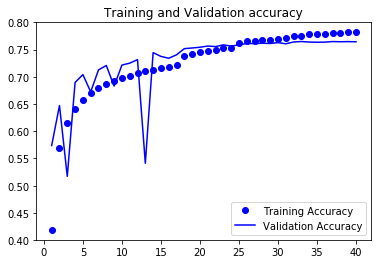

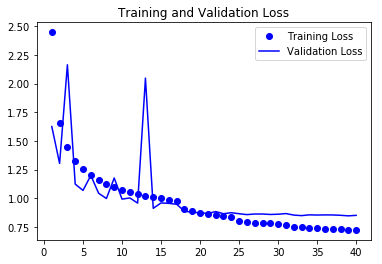

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1 )

plt.plot(epochs, acc, 'bo' , label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b' , label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo' , label = 'Training Loss')
plt.plot(epochs, val_loss, 'b' , label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# test데이터 전처리

In [12]:
def preprocessing_test(df) :
    X= []
    keys = df.iloc[:].index
    for i in tqdm(range(len(df.loc[keys,'drawing'].values))) :
        drawing = ast.literal_eval(df.loc[keys,'drawing'].values[i])
        img = make_img(drawing)
        img = np.array(img.resize((64,64)))
        img = img.reshape(64,64,1)
        X.append(img)
    
    tmpx = np.array(X)
    return tmpx

test = pd.read_csv(os.path.join('/kaggle/input/quickdraw-doodle-recognition', 'test_simplified.csv'))
x_test = preprocessing_test(test)
print(test.shape, x_test.shape)
test.head()

100%|██████████| 112199/112199 [10:55<00:00, 171.11it/s]


(112199, 3) (112199, 64, 64, 1)


,key_id,countrycode,drawing
0,9000003627287624,DE,"[[[17, 18, 20, 25, 137, 174, 242, 249, 251, 25..."
1,9000010688666847,UA,"[[[174, 145, 106, 38, 11, 4, 4, 15, 29, 78, 16..."
2,9000023642890129,BG,"[[[0, 12, 14, 17, 16, 24, 55, 57, 60, 79, 82, ..."
3,9000038588854897,US,"[[[0, 9, 23, 40, 54, 60, 81, 105, 123, 167, 20..."
4,9000052667981386,AR,"[[[87, 82, 71, 63, 66, 92, 96, 95], [220, 218,..."


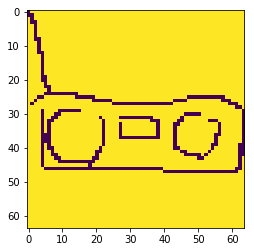

In [13]:
plt.imshow(x_test[0].reshape(64,64))

# test데이터 예측

In [14]:
imgs = x_test
pred = CNN.predict(imgs, verbose=1)
top_3 = np.argsort(-pred)[:, 0:3]
print("Finished !!")

#print(pred)
print(top_3)

112199/112199 [==============================] - 18s 164us/step
Finished !!
[[236 131 270]
 [ 30 190 203]
 [ 40 180 223]
 ...
 [186 328  29]
 [182  29 246]
 [301 336 218]]


# top3 예측값 클래스이름으로 변환

In [15]:
top_3_pred = ['%s %s %s' % (class_label[k[0]], class_label[k[1]], class_label[k[2]]) for k in top_3]
print(top_3_pred[0:5])

['radio stereo snorkel', 'hockey_puck belt bottlecap', 'The_Great_Wall_of_China castle camel', 'mountain tent axe', 'fireplace campfire feather']


# 제출

In [16]:
preds_df = pd.read_csv('/kaggle/input/quickdraw-doodle-recognition/sample_submission.csv', index_col=['key_id'])
preds_df['word'] = top_3_pred
preds_df.to_csv('subcnn_small.csv')
preds_df.head()

,word
key_id,
9000003627287624,radio stereo snorkel
9000010688666847,hockey_puck belt bottlecap
9000023642890129,The_Great_Wall_of_China castle camel
9000038588854897,mountain tent axe
9000052667981386,fireplace campfire feather
